
1. DATA LOADING AND INITIAL PREVIEW

Dataset Shape: 1010 rows × 8 columns

First 5 rows:


,job_title,experience_level,employment_type,salary,salary_in_usd,company_size,remote_ratio,company_location
0,Analyst,MI,FT,48354,-5000,L,50,US
1,ML Engineer,MI,FT,52190,5000000,M,50,DE
2,Data Scientist,SE,FT,36142,30192,M,0,CA
3,Analyst,EN,FT,189470,66413,L,0,IN
4,Analyst,MI,FT,71862,173888,L,50,GB



Column Names and Types:
job_title           object
experience_level    object
employment_type     object
salary               int64
salary_in_usd        int64
company_size        object
remote_ratio         int64
company_location    object
dtype: object

2. FEATURE SUMMARY STATISTICS

Numeric Features (3): ['salary', 'salary_in_usd', 'remote_ratio']

Numeric Summary Statistics:
              salary  salary_in_usd  remote_ratio
count    1010.000000   1.010000e+03   1010.000000
mean   115744.023762   1.252181e+05     47.425743
std     49520.754085   2.230057e+05     39.924445
min     30159.000000  -5.000000e+03      0.000000
25%     73937.500000   7.196750e+04      0.000000
50%    115050.000000   1.149135e+05     50.000000
75%    160032.000000   1.596215e+05    100.000000
max    199578.000000   5.000000e+06    100.000000


Categorical Features (5): ['job_title', 'experience_level', 'employment_type', 'company_size', 'company_location']

Feature: job_title
  Unique values: 4
  Top 5 valu

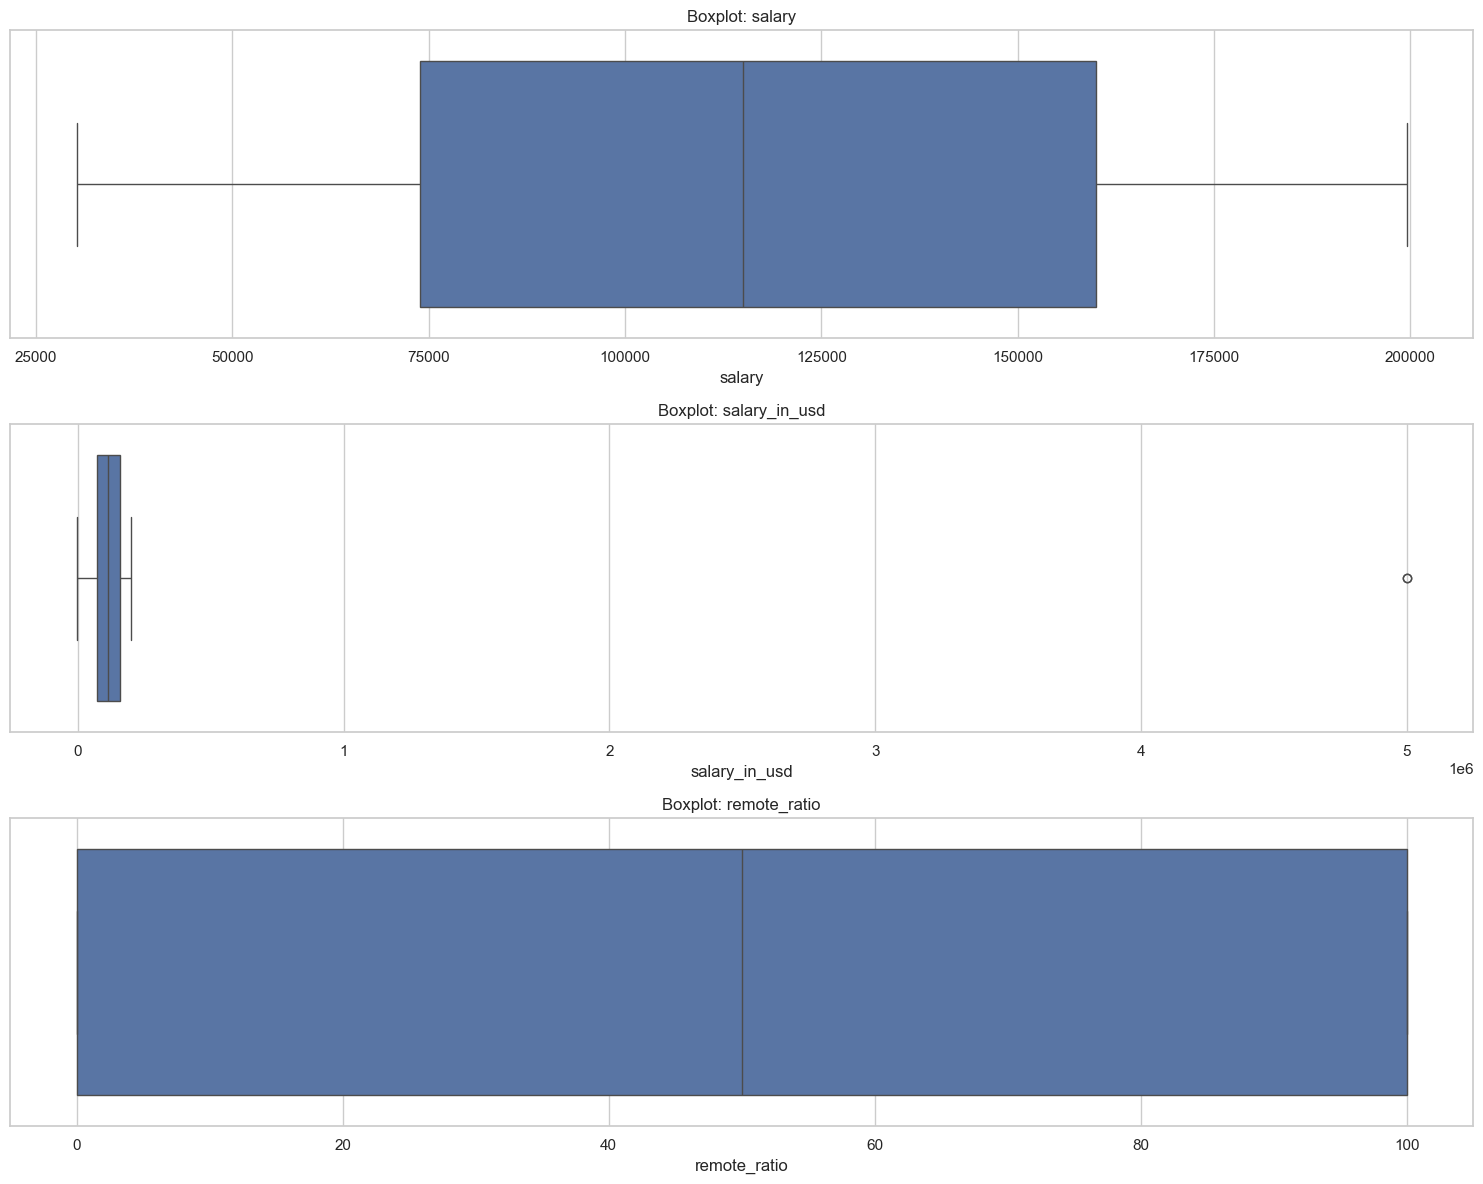


5. DISTRIBUTION VISUALIZATIONS


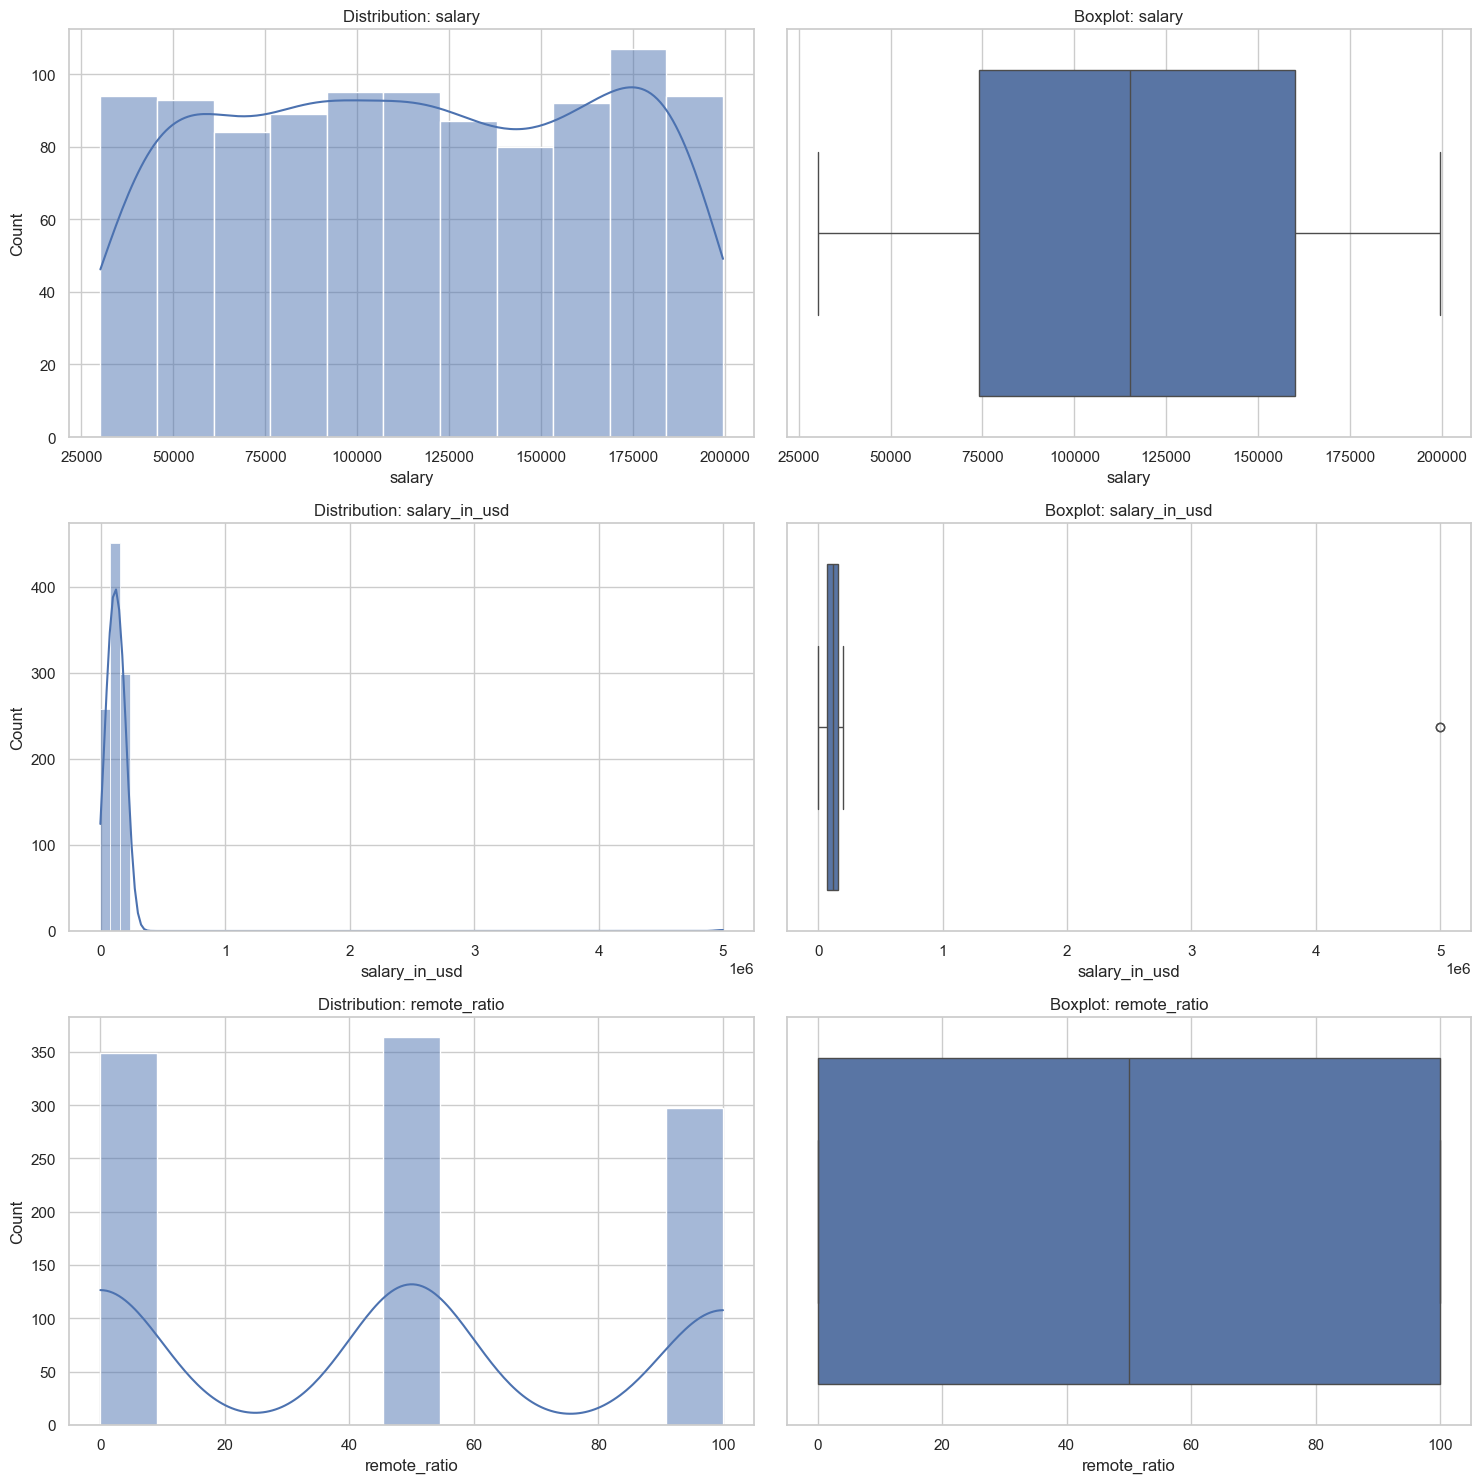

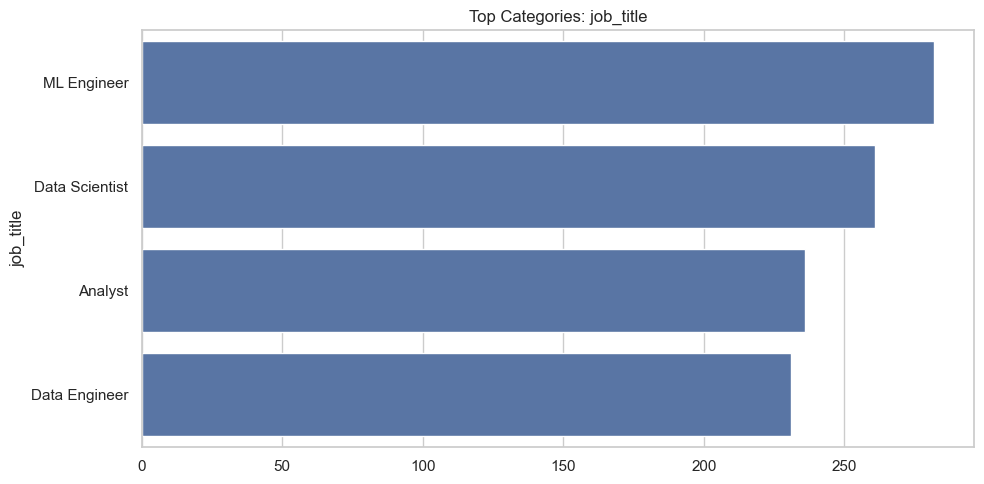

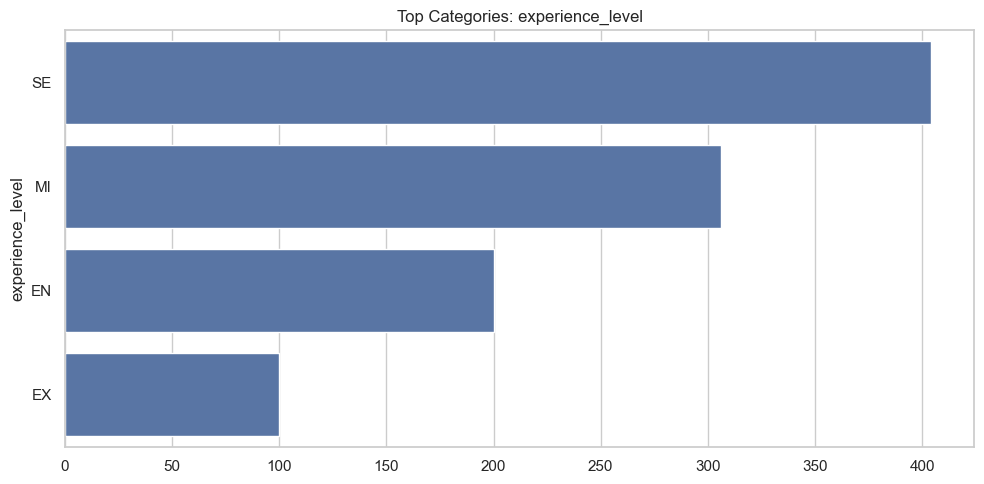

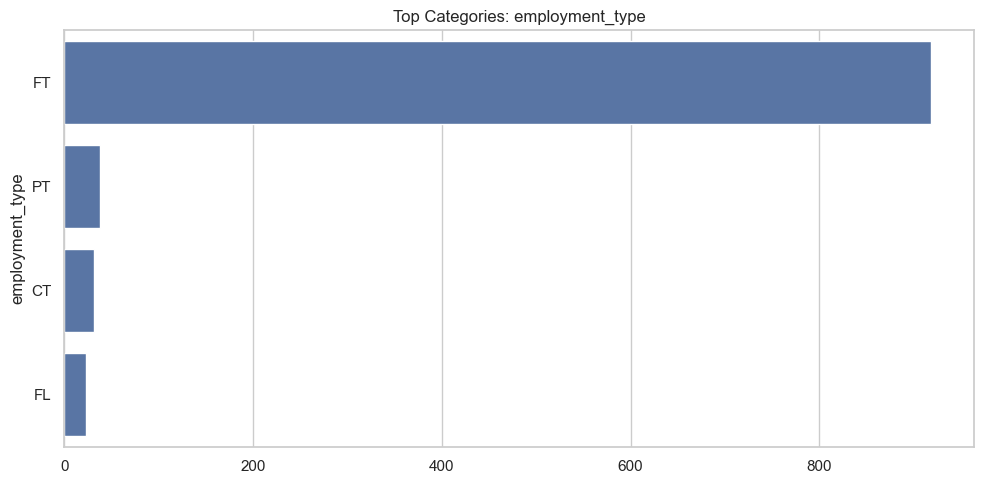

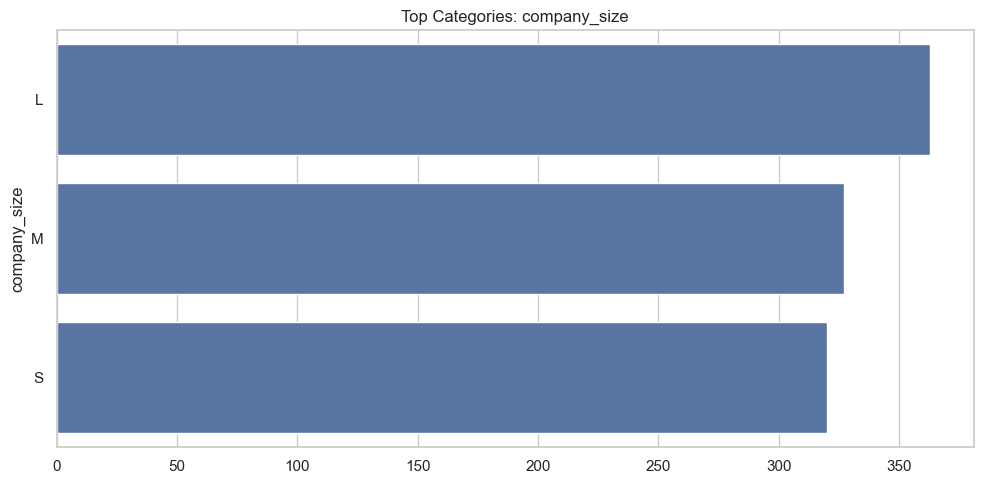

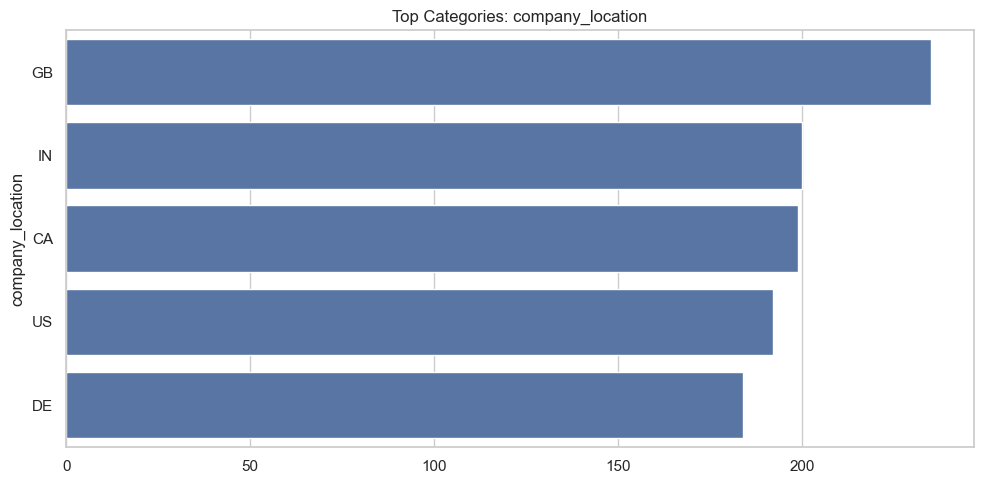


6. CORRELATION ANALYSIS


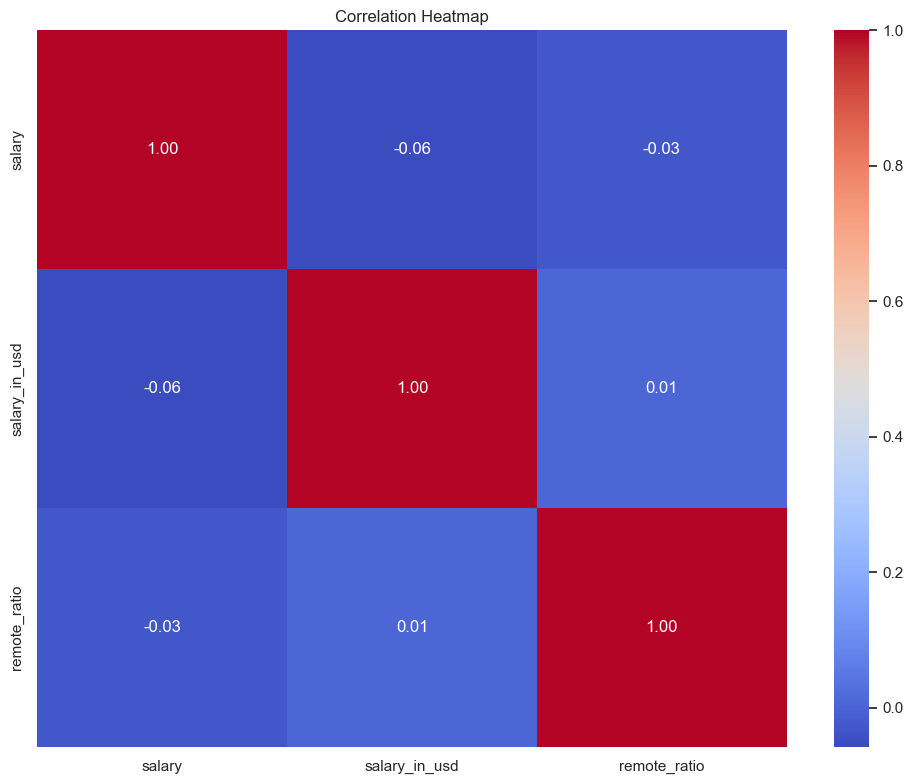


7. DATA QUALITY ISSUES REPORT
⚠ Found 2 extreme salary outliers (> 4 std devs)

8. COMPREHENSIVE FEATURE SUMMARY
            Feature    Type  Unique_Values  Missing    Min      Max       Mean
0         job_title  object              4        0      -        -          -
1  experience_level  object              4        0      -        -          -
2   employment_type  object              4        0      -        -          -
3            salary   int64            999        0  30159   199578  115744.02
4     salary_in_usd   int64            994        0  -5000  5000000  125218.06
5      company_size  object              3        0      -        -          -
6      remote_ratio   int64              3        0      0      100      47.43
7  company_location  object              5        0      -        -          -

EDA COMPLETE


In [16]:
# ============================================================================
# IMPORTS AND SETUP
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings for Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# ============================================================================
# 0. HELPER: GENERATE DUMMY DATA (For Demonstration)
# ============================================================================
def create_dummy_data(filename='dummy_salaries.csv'):
    """Creates a sample dataset if one doesn't exist for testing."""
    print("Generating dummy data for demonstration...")
    np.random.seed(42)
    n_rows = 1000
    
    data = {
        'job_title': np.random.choice(['Data Scientist', 'Data Engineer', 'Analyst', 'ML Engineer'], n_rows),
        'experience_level': np.random.choice(['SE', 'MI', 'EN', 'EX'], n_rows, p=[0.4, 0.3, 0.2, 0.1]),
        'employment_type': np.random.choice(['FT', 'PT', 'CT', 'FL'], n_rows, p=[0.9, 0.05, 0.03, 0.02]),
        'salary': np.random.randint(30000, 200000, n_rows),
        'salary_in_usd': np.random.randint(30000, 200000, n_rows), # Simulating simplified conversion
        'company_size': np.random.choice(['S', 'M', 'L'], n_rows),
        'remote_ratio': np.random.choice([0, 50, 100], n_rows),
        'company_location': np.random.choice(['US', 'GB', 'CA', 'DE', 'IN'], n_rows)
    }
    
    # Introduce some anomalies for the script to find
    df = pd.DataFrame(data)
    
    # Add a negative salary (anomaly)
    df.loc[0, 'salary_in_usd'] = -5000 
    # Add an extreme outlier
    df.loc[1, 'salary_in_usd'] = 5000000 
    # Add some duplicates
    df = pd.concat([df, df.iloc[:10]]) 
    
    df.to_csv(filename, index=False)
    print(f"✓ Created '{filename}' with {len(df)} rows.")
    return filename

# ============================================================================
# 1. LOAD AND PREVIEW DATA
# ============================================================================
def load_and_preview_data(filepath):
    """Load dataset and display initial overview"""
    print("\n" + "="*80)
    print("1. DATA LOADING AND INITIAL PREVIEW")
    print("="*80)
    
    try:
        df = pd.read_csv(filepath)
    except FileNotFoundError:
        print(f"Error: File '{filepath}' not found.")
        return None

    print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
    print("First 5 rows:")
    display(df.head()) if 'ipykernel' in str(type(get_ipython())) else print(df.head())
    
    print("\nColumn Names and Types:")
    print(df.dtypes)
    
    return df

# ============================================================================
# 2. SUMMARIZE FEATURES
# ============================================================================
def summarize_features(df):
    """Generate comprehensive summary statistics"""
    print("\n" + "="*80)
    print("2. FEATURE SUMMARY STATISTICS")
    print("="*80)
    
    # Numeric features
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"\nNumeric Features ({len(numeric_cols)}): {numeric_cols}")
    print("\nNumeric Summary Statistics:")
    print(df[numeric_cols].describe())
    
    # Categorical features
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print(f"\n\nCategorical Features ({len(categorical_cols)}): {categorical_cols}")
    
    for col in categorical_cols:
        print(f"\nFeature: {col}")
        print(f"  Unique values: {df[col].nunique()}")
        print(f"  Top 5 values:\n{df[col].value_counts().head(5)}")
        
    return numeric_cols, categorical_cols

# ============================================================================
# 3. DATA QUALITY CHECKS
# ============================================================================
def check_data_quality(df):
    """Check for missing values, duplicates, and inconsistencies"""
    print("\n" + "="*80)
    print("3. DATA QUALITY CHECKS")
    print("="*80)
    
    # Missing values
    print("\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct
    }).sort_values('Missing_Count', ascending=False)
    
    if missing_df['Missing_Count'].sum() > 0:
        print(missing_df[missing_df['Missing_Count'] > 0])
    else:
        print("✓ No missing values found!")

    # Duplicates
    print("\nDuplicate Rows:")
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"⚠ Warning: {duplicates} duplicate rows detected!")
    else:
        print("✓ No duplicate rows found!")

    # Check for specific salary anomalies (if columns exist)
    print("\nLogic Checks (Salary):")
    if 'salary' in df.columns:
        print(f"  Negative salaries: {(df['salary'] < 0).sum()}")
    if 'salary_in_usd' in df.columns:
        print(f"  Negative USD salaries: {(df['salary_in_usd'] < 0).sum()}")
        print(f"  Zero USD salaries: {(df['salary_in_usd'] == 0).sum()}")
    
    return missing_df

# ============================================================================
# 4. OUTLIER DETECTION
# ============================================================================
def detect_outliers(df, numeric_cols):
    """Detect outliers using IQR method and visualizations"""
    print("\n" + "="*80)
    print("4. OUTLIER DETECTION")
    print("="*80)
    
    outlier_summary = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            'Count': len(outliers),
            'Percentage': 100 * len(outliers) / len(df),
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        }
    
    outlier_df = pd.DataFrame(outlier_summary).T
    print("\nOutlier Summary (IQR Method):")
    print(outlier_df)
    
    # Visualize outliers
    if len(numeric_cols) > 0:
        plt.figure(figsize=(15, 4 * len(numeric_cols)))
        for i, col in enumerate(numeric_cols):
            plt.subplot(len(numeric_cols), 1, i+1)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot: {col}')
        plt.tight_layout()
        plt.show()
    
    return outlier_df

# ============================================================================
# 5. DISTRIBUTION VISUALIZATIONS
# ============================================================================
def visualize_distributions(df, numeric_cols, categorical_cols):
    """Create histograms and bar plots"""
    print("\n" + "="*80)
    print("5. DISTRIBUTION VISUALIZATIONS")
    print("="*80)
    
    # Numeric distributions
    if len(numeric_cols) > 0:
        plt.figure(figsize=(15, 5 * len(numeric_cols)))
        for i, col in enumerate(numeric_cols):
            # Histogram
            plt.subplot(len(numeric_cols), 2, 2*i + 1)
            sns.histplot(df[col], kde=True)
            plt.title(f'Distribution: {col}')
            
            # Boxplot
            plt.subplot(len(numeric_cols), 2, 2*i + 2)
            sns.boxplot(x=df[col])
            plt.title(f'Boxplot: {col}')
        plt.tight_layout()
        plt.show()
    
    # Categorical distributions (Limit to top 10 categories to avoid clutter)
    for col in categorical_cols:
        if df[col].nunique() < 50: # Only plot if reasonably low cardinality
            plt.figure(figsize=(10, 5))
            top_cats = df[col].value_counts().head(10)
            sns.barplot(x=top_cats.values, y=top_cats.index)
            plt.title(f'Top Categories: {col}')
            plt.tight_layout()
            plt.show()

# ============================================================================
# 6. CORRELATION ANALYSIS
# ============================================================================
def analyze_correlations(df, numeric_cols, categorical_cols):
    """Compute correlations and heatmap"""
    print("\n" + "="*80)
    print("6. CORRELATION ANALYSIS")
    print("="*80)
    
    if len(numeric_cols) > 1:
        corr_matrix = df[numeric_cols].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.tight_layout()
        plt.show()
        return corr_matrix
    else:
        print("Not enough numeric columns for correlation analysis.")
        return None

# ============================================================================
# 7. DATA QUALITY ISSUES REPORT
# ============================================================================
def identify_quality_issues(df, categorical_cols):
    """Identify potential specific issues"""
    print("\n" + "="*80)
    print("7. DATA QUALITY ISSUES REPORT")
    print("="*80)
    
    issues = []
    
    # Check for inconsistent categories (case sensitivity)
    for col in categorical_cols:
        unique_vals = df[col].dropna().unique()
        lower_vals = [str(v).lower().strip() for v in unique_vals]
        if len(lower_vals) != len(set(lower_vals)):
            issues.append(f"⚠ '{col}' may have inconsistent casing (e.g., 'Data' vs 'data')")

    # Check for extreme salary values
    if 'salary_in_usd' in df.columns:
        mean_sal = df['salary_in_usd'].mean()
        std_sal = df['salary_in_usd'].std()
        threshold = mean_sal + (4 * std_sal)
        extreme_count = (df['salary_in_usd'] > threshold).sum()
        if extreme_count > 0:
            issues.append(f"⚠ Found {extreme_count} extreme salary outliers (> 4 std devs)")

    if not issues:
        print("✓ No obvious logic issues detected.")
    else:
        for issue in issues:
            print(issue)
            
    return issues

# ============================================================================
# 8. COMPREHENSIVE SUMMARY TABLE
# ============================================================================
def create_summary_table(df, missing_df):
    """Create a final summary dataframe"""
    print("\n" + "="*80)
    print("8. COMPREHENSIVE FEATURE SUMMARY")
    print("="*80)
    
    summary_data = []
    
    for col in df.columns:
        row = {
            'Feature': col,
            'Type': str(df[col].dtype),
            'Unique_Values': df[col].nunique(),
            'Missing': missing_df.loc[col, 'Missing_Count'] if col in missing_df.index else 0,
        }
        
        if pd.api.types.is_numeric_dtype(df[col]):
            row['Min'] = df[col].min()
            row['Max'] = df[col].max()
            row['Mean'] = round(df[col].mean(), 2)
        else:
            row['Min'] = '-'
            row['Max'] = '-'
            row['Mean'] = '-'
            
        summary_data.append(row)
    
    summary_df = pd.DataFrame(summary_data)
    print(summary_df)
    return summary_df

# ============================================================================
# MAIN EXECUTION BLOCK
# ============================================================================
if __name__ == "__main__":
    
    # 1. SETUP DATA (Generate Dummy Data for this example)
    # If you have your own file, change this to: filepath = 'your_dataset.csv'
    filepath = 'dummy_salaries.csv'
    if not os.path.exists(filepath):
        create_dummy_data(filepath)
    
    # 2. RUN ANALYSIS PIPELINE
    df_loaded = load_and_preview_data(filepath)
    
    if df_loaded is not None:
        numeric_cols, categorical_cols = summarize_features(df_loaded)
        missing_df = check_data_quality(df_loaded)
        outlier_df = detect_outliers(df_loaded, numeric_cols)
        visualize_distributions(df_loaded, numeric_cols, categorical_cols)
        corr_matrix = analyze_correlations(df_loaded, numeric_cols, categorical_cols)
        issues = identify_quality_issues(df_loaded, categorical_cols)
        summary_df = create_summary_table(df_loaded, missing_df)
        
        print("\n" + "="*80)
        print("EDA COMPLETE")
        print("="*80)

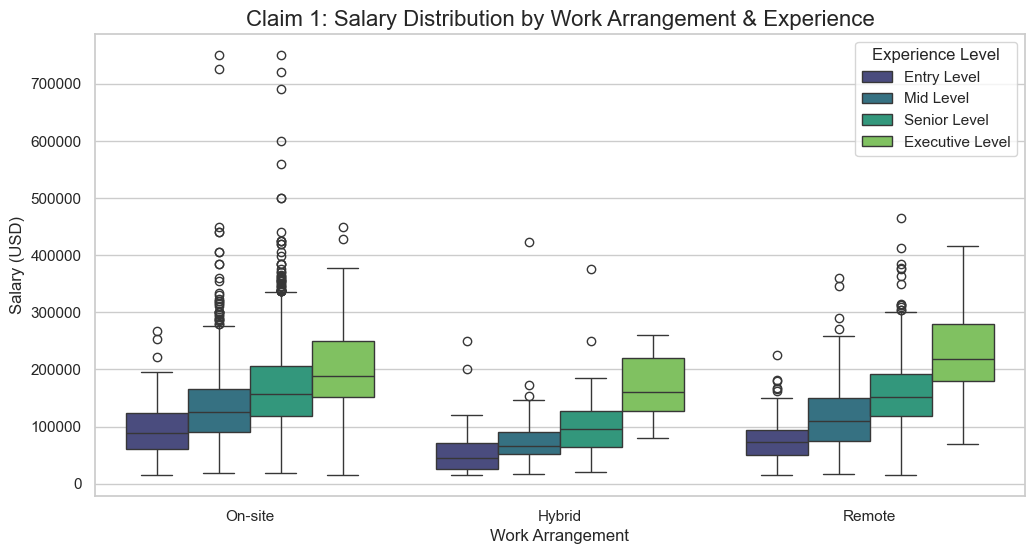

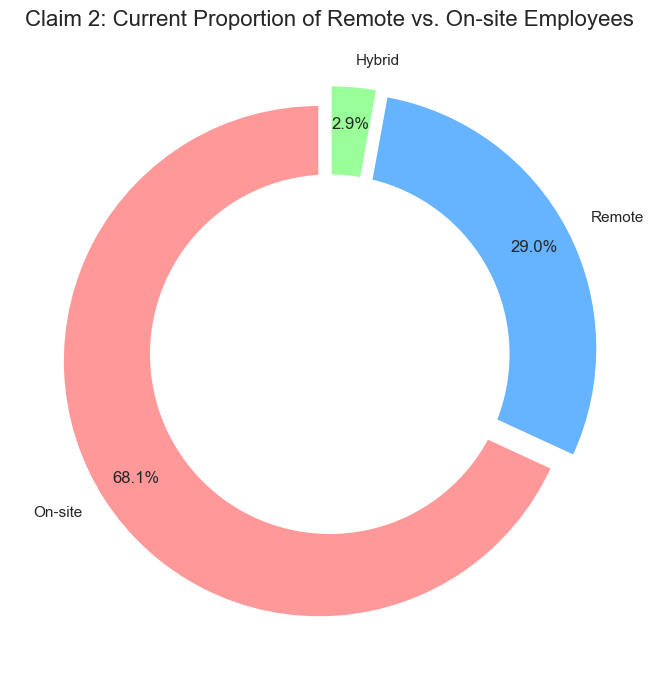

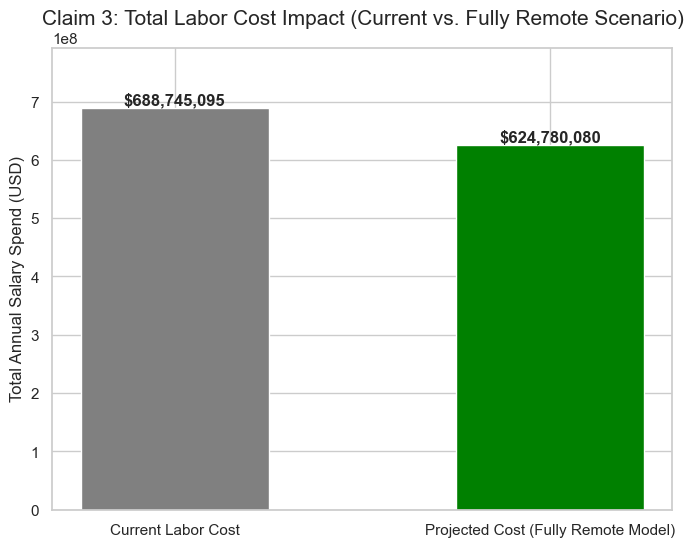

Potential Savings: $63,965,015 (9.29%)


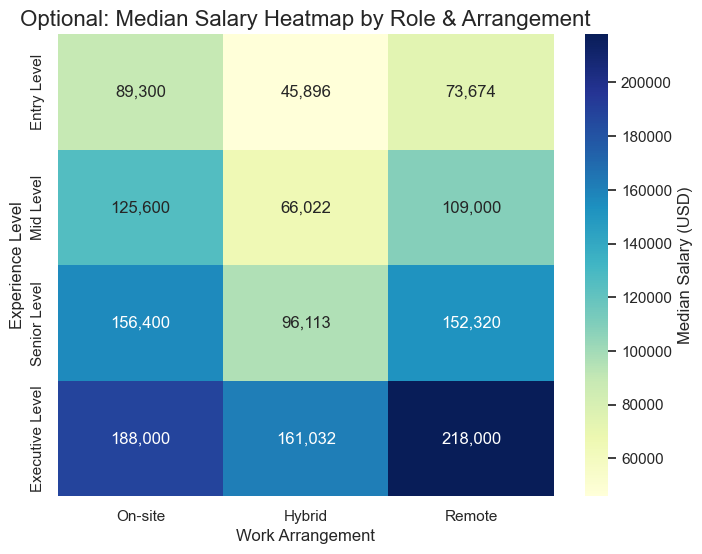

In [17]:
# ==========================================
# 1. SETUP & DATA PREPARATION
# ==========================================
# Load Data
df = pd.read_csv("FoAI_A2_data_4.6k.csv")

# Set Style
sns.set(style="whitegrid")

# Mappings for cleaner labels
experience_map = {
    'EN': 'Entry Level',
    'MI': 'Mid Level',
    'SE': 'Senior Level',
    'EX': 'Executive Level'
}
remote_map = {
    0: 'On-site', 
    50: 'Hybrid', 
    100: 'Remote'
}

# Apply Mappings
df['Experience Level'] = df['experience_level'].map(experience_map)
df['Work Arrangement'] = df['remote_ratio'].map(remote_map)

# Define logical order for charts
exp_order = ['Entry Level', 'Mid Level', 'Senior Level', 'Executive Level']
remote_order = ['On-site', 'Hybrid', 'Remote']

# ==========================================
# 2. VISUAL FOR CLAIM 1: REMOTE WORK AFFECTS SALARY
#    (Grouped Box Plot)
# ==========================================
plt.figure(figsize=(12, 6))

sns.boxplot(
    x='Work Arrangement',
    y='salary_in_usd',
    hue='Experience Level',
    data=df,
    order=remote_order,
    hue_order=exp_order,
    palette='viridis'
)

plt.title('Claim 1: Salary Distribution by Work Arrangement & Experience', fontsize=16)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xlabel('Work Arrangement', fontsize=12)
plt.legend(title='Experience Level', loc='upper right')
plt.show()


# ==========================================
# 3. VISUAL FOR CLAIM 2: CURRENT REMOTE ADOPTION
#    (Donut/Pie Chart)
# ==========================================
# Calculate counts
adoption_counts = df['Work Arrangement'].value_counts()

# Prepare data for pie chart
labels = adoption_counts.index
sizes = adoption_counts.values
colors = ['#ff9999', '#66b3ff', '#99ff99'] # Soft colors (Red, Blue, Green)

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0.05, 0.05))

# Draw a circle at the center to make it a Donut Chart (looks more modern)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Claim 2: Current Proportion of Remote vs. On-site Employees', fontsize=16)
plt.tight_layout()
plt.show()


# ==========================================
# 4. VISUAL FOR CLAIM 3: LABOR COST IMPACT SCENARIO
#    (Scenario Bar Chart: Current vs. Projected)
# ==========================================
# Calculate Current Total Annual Cost
current_total_cost = df['salary_in_usd'].sum()

# Calculate "Projected" Cost (If everyone switched to Remote rates)
# Step A: Find median salary for 'Remote' roles at each experience level
remote_benchmarks = df[df['remote_ratio'] == 100].groupby('Experience Level')['salary_in_usd'].median()

# Step B: Apply these benchmarks to the whole dataset based on experience level
# (This simulates: "What if we paid everyone the current market rate for Remote work?")
def get_projected_salary(row):
    # Lookup the median remote salary for this person's level
    return remote_benchmarks.get(row['Experience Level'], row['salary_in_usd'])

df['projected_remote_salary'] = df.apply(get_projected_salary, axis=1)
projected_total_cost = df['projected_remote_salary'].sum()

# Step C: Plot
costs = [current_total_cost, projected_total_cost]
scenarios = ['Current Labor Cost', 'Projected Cost (Fully Remote Model)']
colors = ['grey', 'green']

plt.figure(figsize=(8, 6))
bars = plt.bar(scenarios, costs, color=colors, width=0.5)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000000, f'${yval:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Claim 3: Total Labor Cost Impact (Current vs. Fully Remote Scenario)', fontsize=15)
plt.ylabel('Total Annual Salary Spend (USD)', fontsize=12)
plt.ylim(0, max(costs) * 1.15) # Add headroom for labels
plt.show()

# Print Savings Calculation for your report text
savings = current_total_cost - projected_total_cost
print(f"Potential Savings: ${savings:,.0f} ({(savings/current_total_cost)*100:.2f}%)")


# ==========================================
# 5. OPTIONAL VISUAL: PATTERNS BY LEVEL
#    (Heatmap of Median Salaries)
# ==========================================
# Create a pivot table of Median Salary
pivot_table = df.pivot_table(
    values='salary_in_usd', 
    index='Experience Level', 
    columns='Work Arrangement', 
    aggfunc='median'
).reindex(exp_order) # Ensure correct order

# Reorder columns
pivot_table = pivot_table[['On-site', 'Hybrid', 'Remote']]

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=",.0f", cmap="YlGnBu", cbar_kws={'label': 'Median Salary (USD)'})
plt.title('Optional: Median Salary Heatmap by Role & Arrangement', fontsize=16)
plt.xlabel('Work Arrangement')
plt.ylabel('Experience Level')
plt.show()

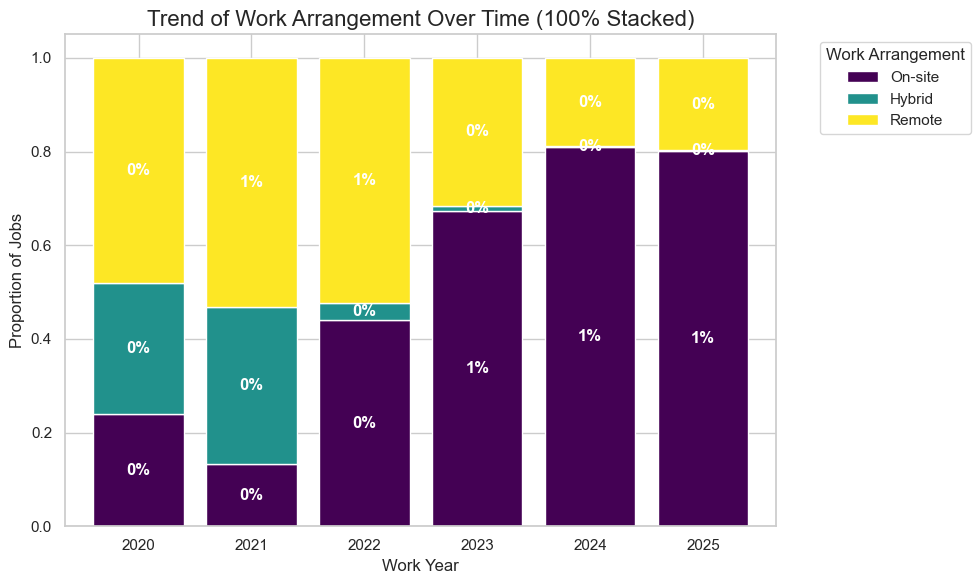

In [18]:
# ==========================================
# TREND VISUAL: WORK ARRANGEMENT OVER TIME
# (100% Stacked Bar Chart)
# ==========================================

# 1. Prepare Data: Calculate the percentage of each arrangement per year
# 'normalize="index"' converts counts to percentages (0 to 1) automatically
trend_data = pd.crosstab(df['work_year'], df['Work Arrangement'], normalize='index')

# Reorder columns to match your preferred logic (On-site -> Remote)
trend_data = trend_data[['On-site', 'Hybrid', 'Remote']]

# 2. Plot
ax = trend_data.plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 6), 
    colormap='viridis', # Consistent color scheme
    width=0.8
)

# 3. Styling
plt.title('Trend of Work Arrangement Over Time (100% Stacked)', fontsize=16)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Proportion of Jobs', fontsize=12)
plt.xticks(rotation=0) # Keep years horizontal

# 4. Move Legend to the Right
plt.legend(
    title='Work Arrangement', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

# Optional: Add percentage labels on the bars
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f%%', label_type='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

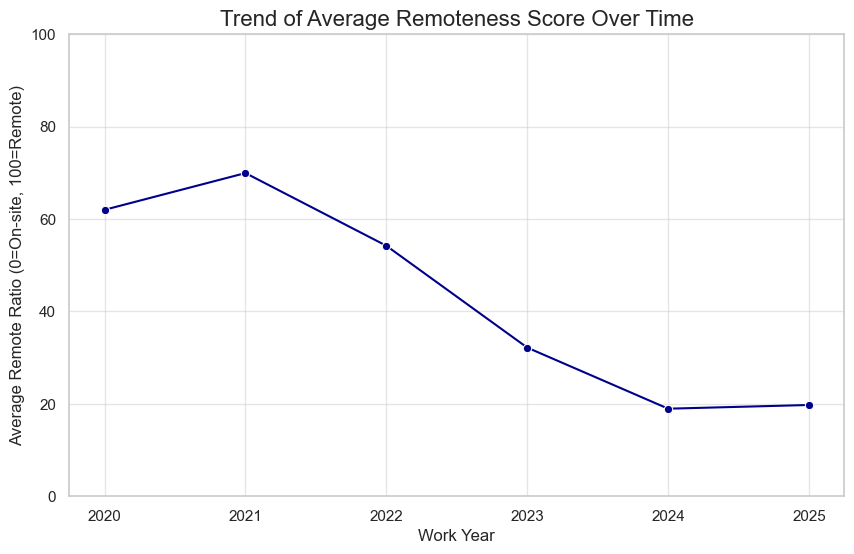

In [19]:
plt.figure(figsize=(10, 6))

# Calculate the mean remote ratio per year
trend_data = df.groupby('work_year')['remote_ratio'].mean().reset_index()

sns.lineplot(
    data=trend_data,
    x='work_year',
    y='remote_ratio',
    marker='o',
    linestyle='-',
    color='darkblue'
)

plt.title('Trend of Average Remoteness Score Over Time', fontsize=16)
plt.xlabel('Work Year', fontsize=12)
plt.ylabel('Average Remote Ratio (0=On-site, 100=Remote)', fontsize=12)
plt.xticks(df['work_year'].unique().astype(int))
plt.ylim(0, 100)
plt.grid(True, alpha=0.5)
plt.show()

<Figure size 1200x600 with 0 Axes>

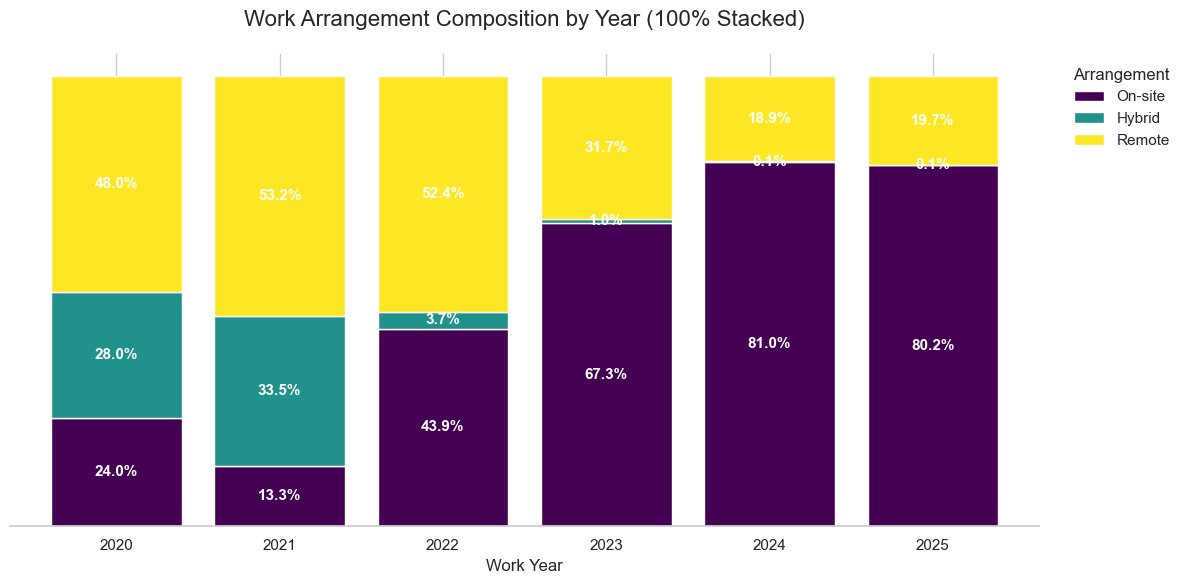

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 0. DATA SETUP & MAPPING
# ==========================================
# Mapping based on Data Description:
remote_map = {
    0: 'On-site', 
    50: 'Hybrid', 
    100: 'Remote'
}

# Create a clean categorical column
df['Work Arrangement'] = df['remote_ratio'].map(remote_map)

# ==========================================
# 1. ANALYSIS: COMPOSITION (100% STACKED)
# ==========================================

# Step 1: Calculate the proportion of each arrangement per year
# normalize='index' converts counts to percentages where the row sum is 100%
proportions = pd.crosstab(df['work_year'], df['Work Arrangement'], normalize='index')

# Step 2: Convert to percentage (0-100 scale) for better readability
proportions = proportions * 100

# Reorder columns for logical flow (On-site -> Hybrid -> Remote)
proportions = proportions[['On-site', 'Hybrid', 'Remote']]

# ==========================================
# 2. VISUALIZATION (100% STACKED BAR)
# ==========================================
plt.figure(figsize=(12, 6))

# Plotting
ax = proportions.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='viridis', 
    width=0.8,
    edgecolor='white' # White borders make segments distinct
)

# Add Data Labels (Percentages) to the CENTER of the segments
for c in ax.containers:
    # fmt='%.1f%%': Show 1 decimal place (e.g., 25.5%) for precision
    # label_type='center': Places the text inside the bar segment
    ax.bar_label(c, fmt='%.1f%%', label_type='center', color='white', fontweight='bold', fontsize=11)

# Styling and Cleanup
plt.title('Work Arrangement Composition by Year (100% Stacked)', fontsize=16, pad=20)
plt.xlabel('Work Year', fontsize=12)

# Hide Y-axis labels since the data labels inside the bars tell the story
plt.ylabel('')
plt.yticks([]) 
sns.despine(left=True) # Remove left spine

# Keep years horizontal
plt.xticks(rotation=0)

# Move Legend to the Right
plt.legend(
    title='Arrangement', 
    bbox_to_anchor=(1.02, 1), 
    loc='upper left',
    frameon=False
)

plt.tight_layout()
plt.show()